<a href="https://colab.research.google.com/github/Bhargavvv412/all-models/blob/main/GradientBoost_Classification_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df= pd.read_csv('/content/drive/MyDrive/Dataset/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [5]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [6]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [7]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [8]:
df['Gender']=df['Gender'].str.replace("Fe Male",'Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df['CityTier'].value_counts()

,count
CityTier,
1,3190
3,1500
2,198


In [10]:
df['TypeofContact'].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [11]:
df['Occupation'].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [12]:
df['ProductPitched'].value_counts()

,count
ProductPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [13]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for features in features_with_na:
  print(features,np.round(df[features].isnull().mean()*100,5), '% missing vales')

Age 4.62357 % missing vales
TypeofContact 0.51146 % missing vales
DurationOfPitch 5.13502 % missing vales
NumberOfFollowups 0.92062 % missing vales
PreferredPropertyStar 0.53191 % missing vales
NumberOfTrips 2.86416 % missing vales
NumberOfChildrenVisiting 1.35025 % missing vales
MonthlyIncome 4.76678 % missing vales


In [14]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [15]:
df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(0,inplace=True)
df.NumberOfChildrenVisiting .fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [16]:
df.drop('CustomerID',inplace=True,axis=1)

In [17]:
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [18]:
num_features= [feature for feature in df.columns if df[feature].dtype != 'O']
len(num_features)

12

In [19]:
cat_features= [feature for feature in df.columns if df[feature].dtype == 'O']
len(cat_features)

6

In [20]:
discrete_features= [feature for feature in num_features if len(df[feature].unique()) <= 25 ]
len(discrete_features)

9

In [21]:
continues_features = [feature for feature in num_features if feature not in discrete_features]
print("Continuous Features:", continues_features)

Continuous Features: ['Age', 'DurationOfPitch', 'MonthlyIncome']


In [22]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [23]:
y.value_counts()

,count
ProdTaken,
0,3968
1,920


In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerix_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numerix_transformer,num_features)
    ]
)

In [26]:
X_train=preprocessor.fit_transform(X_train)

In [27]:
X_test=preprocessor.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,roc_curve,roc_auc_score

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boost": GradientBoostingClassifier()
}

# Loop through models
for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = list(models.values())[i]

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)  # Use X_test, not y_test

    # Training metrics
    model_training_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # Print results
    print(list(models.keys())[i])
    print(f"Model: {model_name}")
    print("Training Metrics:")
    print(f"  Accuracy: {model_training_accuracy:.4f}")
    print(f"  F1 Score: {model_train_f1:.4f}")
    print(f"  Precision: {model_train_precision:.4f}")
    print(f"  Recall: {model_train_recall:.4f}")
    print(f"  ROC-AUC Score: {model_train_rocauc_score:.4f}")

    print("Test Metrics:")
    print(f"  Accuracy: {model_test_accuracy:.4f}")
    print(f"  F1 Score: {model_test_f1:.4f}")
    print(f"  Precision: {model_test_precision:.4f}")
    print(f"  Recall: {model_test_recall:.4f}")
    print(f"  ROC-AUC Score: {model_test_rocauc_score:.4f}")
    print("-" * 50)

Decision Tree
Model: Decision Tree
Training Metrics:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  ROC-AUC Score: 1.0000
Test Metrics:
  Accuracy: 0.9243
  F1 Score: 0.9236
  Precision: 0.9231
  Recall: 0.9243
  ROC-AUC Score: 0.8697
--------------------------------------------------
Random Forest
Model: Random Forest
Training Metrics:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  ROC-AUC Score: 1.0000
Test Metrics:
  Accuracy: 0.9254
  F1 Score: 0.9197
  Precision: 0.9274
  Recall: 0.9254
  ROC-AUC Score: 0.8208
--------------------------------------------------
Logistic Regression
Model: Logistic Regression
Training Metrics:
  Accuracy: 0.8458
  F1 Score: 0.8200
  Precision: 0.8290
  Recall: 0.8458
  ROC-AUC Score: 0.6366
Test Metrics:
  Accuracy: 0.8354
  F1 Score: 0.8078
  Precision: 0.8168
  Recall: 0.8354
  ROC-AUC Score: 0.6301
--------------------------------------------------
Gradient Boost
Model: Gradient Boost
Tra

In [30]:
rf_params={'max_depth':[5,8,15,None,10],
    'max_features':['auto',5,7,8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

gradient_params={
    'loss':['log_loss','deviance','exponential'],
    'n_estimators':[100,200,500,1000],
    'min_samples_split':[2,8,15,20],
    'max_depth':[5,8,15,None,10],
    'criterion':['friedman_mse','squared_error','mse']
}

In [31]:
#hyparparameter tunning
randomcv_models=[
    ("RF",RandomForestClassifier(),rf_params),
    ("gradientboost",GradientBoostingClassifier(),gradient_params)
]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
  random = RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
  random.fit(X_train,y_train)
  model_param[name]=random.best_params_
for model_name in model_param:
  print(f"------------------best params for {model_name}------------------")
  print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [39]:
models = {
    "Random Forest": RandomForestClassifier(max_depth =10,
    max_features=7,
    min_samples_split=2,
    n_estimators=1000),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=500,
                                                            min_samples_split=20,
                                                            max_depth=15,
                                                            loss='exponential',
                                                            criterion='friedman_mse')
}

# Loop through models
for i in range(len(list(models))):
    model = list(models.values())[i]
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)  # Use X_test, not y_test

    # Training metrics
    model_training_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    # Print results
    print(list(models.keys())[i])
    print(f"Model: {model_name}")
    print("Training Metrics:")
    print(f"  Accuracy: {model_training_accuracy:.4f}")
    print(f"  F1 Score: {model_train_f1:.4f}")
    print(f"  Precision: {model_train_precision:.4f}")
    print(f"  Recall: {model_train_recall:.4f}")
    print(f"  ROC-AUC Score: {model_train_rocauc_score:.4f}")

    print("Test Metrics:")
    print(f"  Accuracy: {model_test_accuracy:.4f}")
    print(f"  F1 Score: {model_test_f1:.4f}")
    print(f"  Precision: {model_test_precision:.4f}")
    print(f"  Recall: {model_test_recall:.4f}")
    print(f"  ROC-AUC Score: {model_test_rocauc_score:.4f}")
    print("-" * 50)

Random Forest
Model: Gradient Boost
Training Metrics:
  Accuracy: 0.9547
  F1 Score: 0.9523
  Precision: 0.9570
  Recall: 0.9547
  ROC-AUC Score: 0.8791
Test Metrics:
  Accuracy: 0.8978
  F1 Score: 0.8848
  Precision: 0.9032
  Recall: 0.8978
  ROC-AUC Score: 0.7481
--------------------------------------------------
GradientBoostingClassifier
Model: Gradient Boost
Training Metrics:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  ROC-AUC Score: 1.0000
Test Metrics:
  Accuracy: 0.9591
  F1 Score: 0.9576
  Precision: 0.9597
  Recall: 0.9591
  ROC-AUC Score: 0.9032
--------------------------------------------------


Random Forest
Training Metrics:
  Accuracy: 0.9542
  F1 Score: 0.9517
  Precision: 0.9565
  Recall: 0.9542
  ROC-AUC Score: 0.8778
Test Metrics:
  Accuracy: 0.8967
  F1 Score: 0.8838
  Precision: 0.9012
  Recall: 0.8967
  ROC-AUC Score: 0.9522
--------------------------------------------------
GradientBoostingClassifier
Training Metrics:
  Accuracy: 1.0000
  F1 Score: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  ROC-AUC Score: 1.0000
Test Metrics:
  Accuracy: 0.9581
  F1 Score: 0.9566
  Precision: 0.9585
  Recall: 0.9581
  ROC-AUC Score: 0.9910
--------------------------------------------------


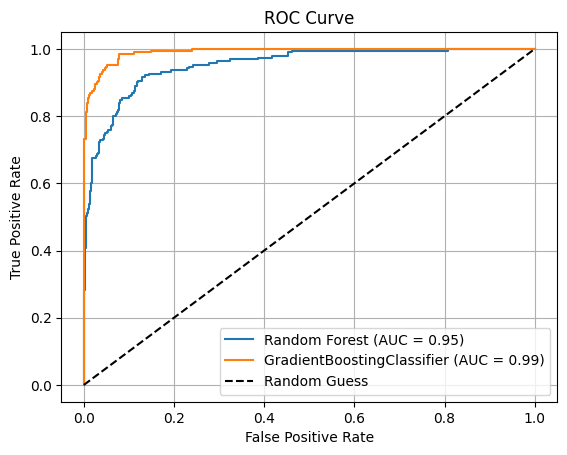

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Loop through models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

    # Training metrics
    model_training_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test metrics
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_rocauc_score = roc_auc_score(y_test, y_test_prob)

    # Print results
    print(model_name)
    print("Training Metrics:")
    print(f"  Accuracy: {model_training_accuracy:.4f}")
    print(f"  F1 Score: {model_train_f1:.4f}")
    print(f"  Precision: {model_train_precision:.4f}")
    print(f"  Recall: {model_train_recall:.4f}")
    print(f"  ROC-AUC Score: {model_train_rocauc_score:.4f}")

    print("Test Metrics:")
    print(f"  Accuracy: {model_test_accuracy:.4f}")
    print(f"  F1 Score: {model_test_f1:.4f}")
    print(f"  Precision: {model_test_precision:.4f}")
    print(f"  Recall: {model_test_recall:.4f}")
    print(f"  ROC-AUC Score: {model_test_rocauc_score:.4f}")
    print("-" * 50)

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {model_test_rocauc_score:.2f})")

# Finalize ROC plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()